# Time series trial

> Testing time series forecast with three models.

- toc: true
- badges: true
- comments: true
- categories: [timeseries, lstm, prophet, sarimax]

In [ ]:
!pip install pytrends gwpy &> /dev/null #--upgrade 

In [ ]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.4.2
Uninstalling matplotlib-3.4.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.2-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.4.2
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gwpy

In [ ]:
  from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd  
import numpy as np
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
from datetime import datetime, date, time
pytrend = TrendReq()

In [ ]:
# Testing current trends
test_df = pytrend.trending_searches(pn='united_states')
today_df = pytrend.today_searches(pn='US')

test_df.head(10)
today_df.head(10)

0            Neeraj Chopra
1      Jessica Springsteen
2                  UFC 265
3               Pentathlon
4          Brazil vs Spain
5              Ben Shapiro
6             Nicole Hurst
7    Man United vs Everton
8             Jayson Tatum
9             Devin Booker
Name: query, dtype: object

In [ ]:
# Sort keyword by regions
pytrend.build_payload(kw_list=['Las Vegas convention'] , timeframe='today 12-m', geo = 'US')
df = pytrend.interest_by_region().sort_values(by='Las Vegas convention', ascending=False)
df.head(10)

Las Vegas convention
geoName                         
Nevada                       100
Utah                           8
New Mexico                     6
Arizona                        6
California                     4
Hawaii                         4
Wisconsin                      3
Colorado                       3
Washington                     3
Texas                          3

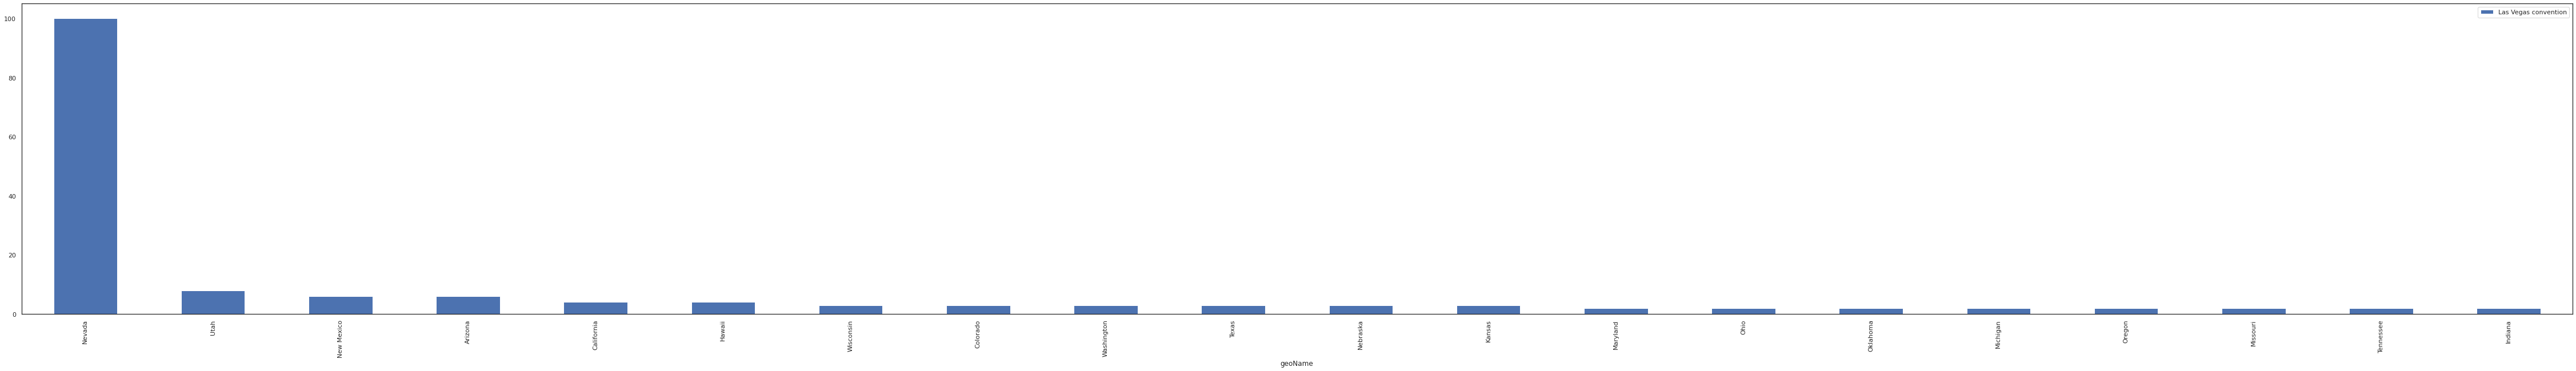

In [ ]:
df.head(20).reset_index().plot(x='geoName', y='Las Vegas convention', figsize=(80, 10), kind ='bar')

In [ ]:
# Find Google search bar keyword suggestions
kw = pytrend.suggestions(keyword='Las Vegas convention')
df = pd.DataFrame(kw)
df.drop(columns= 'mid', inplace=True) 
df

title                                   type
0                   Las Vegas Convention Center  Convention center in Paradise, Nevada
1   Las Vegas Convention and Visitors Authority                                  Topic
2  Las Vegas Convention Center Monorail Station   Monorail station in Paradise, Nevada
3                                     Las Vegas                         City in Nevada
4                 The Venetian Resort Las Vegas              Hotel in Paradise, Nevada

In [ ]:
# print(pytrend.suggestions(keyword='Las Vegas convention'), '\n')
# print(pytrend.suggestions(keyword='Las Vegas conference'), '\n')
# print(pytrend.suggestions(keyword='Las Vegas expo'), '\n')
# print(pytrend.suggestions(keyword='Las Vegas trade show'), '\n')

In [ ]:
# Find related queries
pytrend.build_payload(kw_list=['Las Vegas convention'], timeframe='today 12-m', geo='US')
related_queries = pytrend.related_queries()
related_queries.values() #First part ('top'): Google trends score 1-100 ; Second part ('rising'): interest increased in percentage

dict_values([{'top':                                                 query  value
0                         las vegas convention center    100
1                  las vegas convention center hotels     13
2          embassy suites convention center las vegas      8
3                marriott las vegas convention center      7
4           las vegas convention center covid vaccine      6
5             hampton inn las vegas convention center      5
6                      star trek convention las vegas      5
7                       concrete convention las vegas      3
8           fairfield inn las vegas convention center      3
9                  las vegas convention calendar 2021      3
10          residence inn las vegas convention center      1
11      springhill suites las vegas convention center      1
12  springhill suites by marriott las vegas conven...      1
13                   las vegas convention center loop      1, 'rising':                                                query 

In [ ]:
# Find related topics
related_topics = pytrend.related_topics()
related_topics.values()

dict_values([{'rising':      value  ...                              topic_type
0   206550  ...                                 Vaccine
1   123250  ...                                   Topic
2    54900  ...                                   Topic
3    41350  ...                                   Topic
4    27250  ...        Resort in the Winchester, Nevada
5    27250  ...                             Hotel brand
6    27100  ...  Street in the Las Vegas Valley, Nevada
7    27050  ...                                   Topic
8    13600  ...               Hotel in Paradise, Nevada
9    13550  ...                      Type of convention
10   13550  ...                                Magazine
11   13500  ...                                   Topic
12    3400  ...                                   Topic
13     650  ...                                   Hotel
14     650  ...        Resort in the Winchester, Nevada
15     350  ...                                   Topic
16     130  ...         

In [ ]:
# Find interest of keywords over time
time_df = pytrend.interest_over_time() 
print(time_df.head(50))

            Las Vegas convention isPartial
date                                      
2020-08-09                    12     False
2020-08-16                    16     False
2020-08-23                    22     False
2020-08-30                    30     False
2020-09-06                    16     False
2020-09-13                    22     False
2020-09-20                    14     False
2020-09-27                    18     False
2020-10-04                    17     False
2020-10-11                    18     False
2020-10-18                    19     False
2020-10-25                    15     False
2020-11-01                    12     False
2020-11-08                    14     False
2020-11-15                    24     False
2020-11-22                     4     False
2020-11-29                    21     False
2020-12-06                    21     False
2020-12-13                     2     False
2020-12-20                    10     False
2020-12-27                    21     False
2021-01-03 

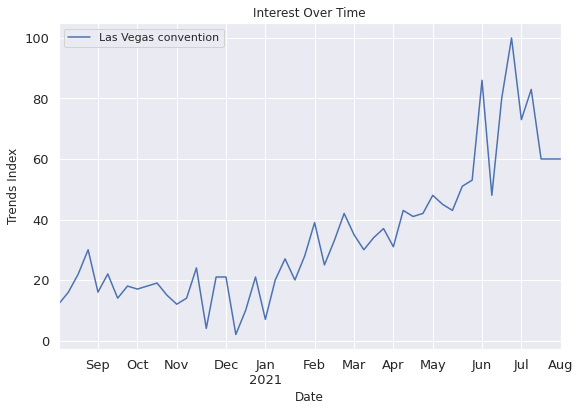

In [ ]:
# Plot trend lines among keywords
sns.set(color_codes=True)
dx = time_df.plot.line(figsize = (9,6), title = "Interest Over Time")
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='major', labelsize=13)

# Multiple Keywords

In [ ]:
# Find related queries
pytrend.build_payload(kw_list=['Las Vegas convention'], timeframe='2010-01-01 2019-12-31', geo='US')
related_queries = pytrend.related_queries()
related_queries.values() #First part ('top'): Google trends score 1-100 ; Second part ('rising'): interest increased in percentage

dict_values([{'top':                                    query  value
0                      convention center    100
1            convention center las vegas     95
2                convention in las vegas     28
3                        las vegas hotel     15
4                       las vegas hotels     14
5                           vegas hotels     13
6     las vegas convention center hotels     11
7          convention calendar las vegas     11
8                    convention calendar     11
9          convention schedule las vegas      9
10                      hilton las vegas      7
11             convention las vegas 2017      7
12                 las vegas conventions      7
13    hilton las vegas convention center      6
14                    marriott las vegas      6
15       las vegas convention center map      6
16  las vegas marriott convention center      5
17                       las vegas strip      5
18              embassy suites las vegas      5
19  marriott conven

In [ ]:
# Find related queries
pytrend.build_payload(kw_list=['Las Vegas conference'], timeframe='2010-01-01 2019-12-31', geo='US')
related_queries = pytrend.related_queries()
related_queries.values() #First part ('top'): Google trends score 1-100 ; Second part ('rising'): interest increased in percentage

dict_values([{'top':                               query  value
0       las vegas conference center    100
1                  las vegas hotels     67
2        las vegas press conference     49
3       las vegas convention center     42
4     las vegas conference schedule     41
5                      mandalay bay     41
6          conferences in las vegas     37
7   veterinary conference las vegas     33
8                 las vegas airport     27
9                 las vegas weather     27
10        las vegas tech conference     26
11    las vegas security conference     25
12         ibm conference las vegas     23
13        shrm conference las vegas     22
14            las vegas conventions     22
15         mountain west conference     21
16                   aria las vegas     21
17               venetian las vegas     21
18                         bellagio     20
19                   wynn las vegas     20
20     gartner conference las vegas     19
21                  shrm conferen

In [ ]:
# Find related queries
pytrend.build_payload(kw_list=['Las Vegas expo'], timeframe='2010-01-01 2019-12-31', geo='US')
related_queries = pytrend.related_queries()
related_queries.values() #First part ('top'): Google trends score 1-100 ; Second part ('rising'): interest increased in percentage

dict_values([{'top':                           query  value
0                    sands expo    100
1          sands expo las vegas     96
2   las vegas convention center     69
3   sands expo center las vegas     54
4                     pack expo     50
5             sands expo center     50
6          pizza expo las vegas     47
7                    pizza expo     44
8            las vegas con expo     33
9          adult expo las vegas     32
10              las vegas shows     30
11                     con expo     29
12        vision expo las vegas     28
13        las vegas conventions     26
14             las vegas hotels     25
15          las vegas food expo     19
16            hd expo las vegas     18
17        las vegas trade shows     17
18        gaming expo las vegas     16
19       las vegas reptile expo     16
20  las vegas construction expo     16
21       las vegas traders expo     15
22       fitness expo las vegas     15
23          home expo las vegas     15
24  

In [ ]:
# Find related queries
pytrend.build_payload(kw_list=['Las Vegas trade show'], timeframe='2010-01-01 2019-12-31', geo='US')
related_queries = pytrend.related_queries()
related_queries.values() #First part ('top'): Google trends score 1-100 ; Second part ('rising'): interest increased in percentage

dict_values([{'top':                               query  value
0                   las vegas shows    100
1                   magic las vegas    100
2                  magic trade show     96
3        las vegas magic trade show     96
4             las vegas trade shows     95
5              magic show las vegas     92
6          trade shows in las vegas     43
7                    asd trade show     34
8          asd trade show las vegas     30
9       las vegas convention center     19
10      champs trade show las vegas     18
11    las vegas trade show schedule     16
12    magic trade show in las vegas     12
13  magic trade show las vegas 2017     11
14          magic show in las vegas     11
15       las vegas trade shows 2017      6
16    asd trade show las vegas 2012      4
17     liberty trade show las vegas      3
18  magic trade show las vegas 2019      2, 'rising':                              query  value
0  magic trade show las vegas 2017  80550
1       las vegas trade 

In [ ]:

# 8 Mandalay bay 

# 9 Sands Expo

# 10 Aria

# 11 Caesars

#  Wynn


In [ ]:
conventions = ['Las Vegas convention', 'Las Vegas conference', 
               'Las Vegas expo','Las Vegas trade show', 'Las Vegas convention calendar',
            'Las Vegas convention schedule']
facility = ['Las Vegas convention center', 'Mandalay bay', 'Sands Expo',
            'Aria', 'Las Vegas Caesars', 'Las Vegas Wynn']
conv_shows = ['International Builder Show',
            'NAB Show', 'ConExpo', 'Las Vegas expo', 'SEMA show',
            'CES', #'MAGIC fashion trade show',
            'Pack Expo Las Vegas','ASD Las Vegas', 'The World of Concrete',
            'G2E']

In [ ]:
searches = conventions + facility + conv_shows

keywords = list(zip(*[iter(searches)]*1))
keywords = [list(x) for x in keywords]

In [ ]:
import requests

In [ ]:
dicti = {}
i = 1

for trending in keywords:
    try: 
      pytrend.build_payload(trending, timeframe = '2009-01-01 2019-12-31', geo ='US')
      dicti[i] = pytrend.interest_over_time()
      i+=1
      #time.sleep(10)

    except requests.exceptions.Timeout:
      pass
    
result = pd.concat(dicti, axis=1)
result.columns = result.columns.droplevel(0)
result = result.drop('isPartial', axis = 1)
result

Las Vegas convention  ...  G2E
date                              ...     
2009-01-01                   100  ...    9
2009-02-01                    81  ...   10
2009-03-01                    70  ...    9
2009-04-01                    49  ...    9
2009-05-01                    46  ...   14
...                          ...  ...  ...
2019-08-01                    35  ...   33
2019-09-01                    33  ...   40
2019-10-01                    33  ...   53
2019-11-01                    38  ...    5
2019-12-01                    37  ...    3

[132 rows x 22 columns]

In [ ]:
# Reshape to long table
result = result.reset_index()
#result = pd.melt(result, id_vars='date') # , value_vars=searches)

In [ ]:
result.to_csv('convention_trends_' + datetime.today().strftime('%Y-%m-%d') +'.csv')

# Correlation Analysis
- filtered key words list by running correlation with key word queries and 

In [ ]:
#load attendance data
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
attendance = pd.melt(pd.read_csv('/content/Las Vegas_Convention Attendance.csv'), 
        id_vars='Year', 
        value_vars =['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'], 
        value_name='Attendance', var_name='month')

# New Section

In [ ]:
attendance['date'] = pd.to_datetime(attendance['month']+ '-' + attendance['Year'].astype(str),
               format='%B-%Y')

In [ ]:
master = attendance.merge(result, on='date').drop(['Year', 'month'], axis=1).set_index('date')

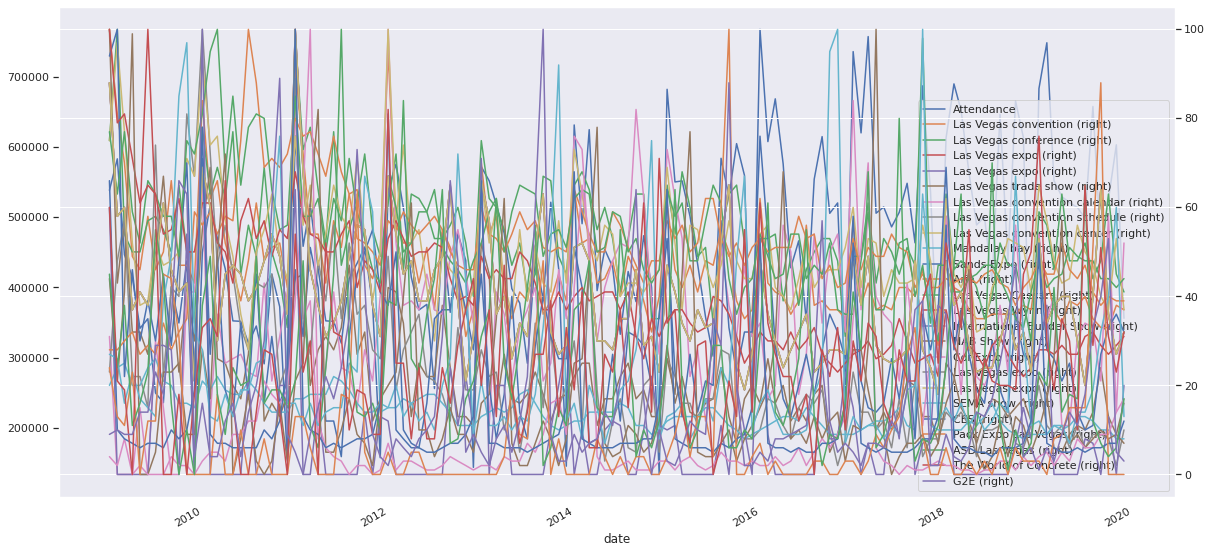

In [ ]:
ax = master.reset_index().plot(x='date', y ='Attendance')
_ = master.reset_index().plot(x='date', 
                          y=searches , #['Las Vegas convention', 'Las Vegas trade show', 'LVCVA'], 
                          ax=ax, secondary_y=True,
                          figsize=(20,10))

In [ ]:
corr_results = master.corr()
corr_results

Attendance  ...       G2E
Attendance                       1.000000  ... -0.087410
Las Vegas convention             0.140075  ... -0.024931
Las Vegas conference             0.336018  ...  0.100163
Las Vegas expo                   0.151399  ...  0.240225
Las Vegas trade show            -0.016544  ... -0.026507
Las Vegas convention calendar    0.253057  ... -0.083898
Las Vegas convention schedule   -0.163153  ...  0.085864
Las Vegas convention center      0.237319  ... -0.039718
Mandalay bay                    -0.035388  ...  0.103333
Sands Expo                       0.203674  ...  0.055472
Aria                            -0.131862  ... -0.049316
Las Vegas Caesars               -0.189755  ... -0.013775
Las Vegas Wynn                  -0.277574  ...  0.048670
International Builder Show       0.080581  ... -0.039320
NAB Show                         0.190833  ... -0.195754
ConExpo                          0.191201  ... -0.112897
Las Vegas expo                   0.151399  ...  0.240225
SEMA show                        0.044146  ...  0.348085
CES                              0.231061  ... -0.184394
Pack Expo Las Vegas              0.028344  ...  0.459774
ASD Las Vegas                    0.091453  ... -0.210820
The World of Concrete            0.171800  ... -0.151853
G2E                             -0.087410  ...  1.000000

[23 rows x 23 columns]

In [ ]:
!pip install pingouin gwpy &> /dev/null
import pingouin as pg 

In [ ]:
pg.read_dataset('pairwise_corr')

Subject  Neuroticism  ...  Agreeableness  Conscientiousness
0          1      2.47917  ...        3.95833            3.45833
1          2      2.60417  ...        3.39583            3.22917
2          3      2.81250  ...        2.75000            3.50000
3          4      2.89583  ...        3.16667            2.79167
4          5      3.02083  ...        3.20833            2.85417
..       ...          ...  ...            ...                ...
495      496      3.06250  ...        3.04167            3.12500
496      497      3.08333  ...        3.22917            3.10417
497      498      3.52083  ...        3.56250            3.00000
498      499      2.08333  ...        3.45833            3.39583
499      500      2.54167  ...        3.45833            2.89583

[500 rows x 6 columns]

In [ ]:
searches

['Las Vegas convention',
 'Las Vegas conference',
 'Las Vegas expo',
 'Las Vegas trade show',
 'Las Vegas convention calendar',
 'Las Vegas convention schedule',
 'Las Vegas convention center',
 'Mandalay bay',
 'Sands Expo',
 'Aria',
 'Las Vegas Caesars',
 'Las Vegas Wynn',
 'International Builder Show',
 'NAB Show',
 'ConExpo',
 'Las Vegas expo',
 'SEMA show',
 'CES',
 'Pack Expo Las Vegas',
 'ASD Las Vegas',
 'The World of Concrete',
 'G2E']

In [ ]:
dfo = master.reset_index().iloc[:, 1:5]
dfo.head()

Attendance  Las Vegas convention  Las Vegas conference  Las Vegas expo
0      538400                   100                    75              88
1      449900                    84                    78              69
2      615900                    92                    98             100
3      538600                    95                    61              67
4      572000                    70                    75              66

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(dfo[['Attendance','Las Vegas convention', 'Las Vegas conference', 'Las Vegas expo']])

Attendance  Las Vegas convention  Las Vegas conference  Las Vegas expo
0        538400                   100                    75              88
1        449900                    84                    78              69
2        615900                    92                    98             100
3        538600                    95                    61              67
4        572000                    70                    75              66
5        631500                    64                    65              51
6        682300                    61                    65              47
7        767700                    62                    53              48
8        736000                    57                    49              49
9        612900                    58                    63              48
10       683400                    50                    59              53
11       583200                    81                   100              58
12       518400                    62                    63              60
13       458600                    72                    73              68
14       575700                    56                    72              54
15       551900                    54                    62              57
16       490800                    52                    68              52
17       550300                    46                    54              41
18       607800                    43                    53              36
19       620200                    38                    49              38
20       690000                    42                    46              38
21       748600                    44                    56              34
22       446600                    70                    54              60
23       470000                    66                    69              30
24       518600                    54                    78              46
25       513000                    52                    46              45
26       518300                    58                    60              36
27       624800                    53                    64              48
28       551800                    42                    68              34
29       668700                    41                    54              30
30       757400                    43                    61              49
31       652400                    41                    48              41
32       552200                    37                    46              38
33       414800                    49                    50              37
34       426700                    52                    62              45
35       426700                    54                    64              38
36       414500                    52                    63              48
37       477300                    41                    55              40
38       395500                    43                    55              30
39       501400                    47                    60              30
40       576000                    40                    39              24
41       505800                    37                    43              29
42       563800                    37                    46              29
43       529500                    34                    63              40
44       341800                    46                    50              41
45       352400                    46                    77              47
46       352400                    43                    52              31
47       367900                    43                    62              39
48       398200                    35                    47              26
49       454200                    44                    60              30
50       433200                    41                    49              37
51       428000                    36                

In [ ]:
#master.pairwise_corr(covar='Attendance', method='spearman')
pg.pairwise_corr(dfo, columns=['Attendance','Las Vegas convention', 'Las Vegas conference', 'Las Vegas expo'],
                 method='pearson')

X                     Y  ...       BF10     power
0            Attendance  Las Vegas convention  ...      0.387  0.362054
1            Attendance  Las Vegas conference  ...    233.673  0.978526
2            Attendance        Las Vegas expo  ...      0.481  0.412440
3  Las Vegas convention  Las Vegas conference  ...   7.46e+10  1.000000
4  Las Vegas convention        Las Vegas expo  ...  2.623e+21  1.000000
5  Las Vegas conference        Las Vegas expo  ...   5.86e+09  1.000000

[6 rows x 10 columns]

In [ ]:
#master.pairwise_corr(covar='Attendance', method='spearman')
pg.pairwise_corr(dfo, columns=['Attendance'],
                 method='pearson')

X                     Y   method  ...     p-unc     BF10     power
0  Attendance  Las Vegas convention  pearson  ...  0.109169    0.387  0.362054
1  Attendance  Las Vegas conference  pearson  ...  0.000082  233.673  0.978526
2  Attendance        Las Vegas expo  pearson  ...  0.083113    0.481  0.412440

[3 rows x 10 columns]

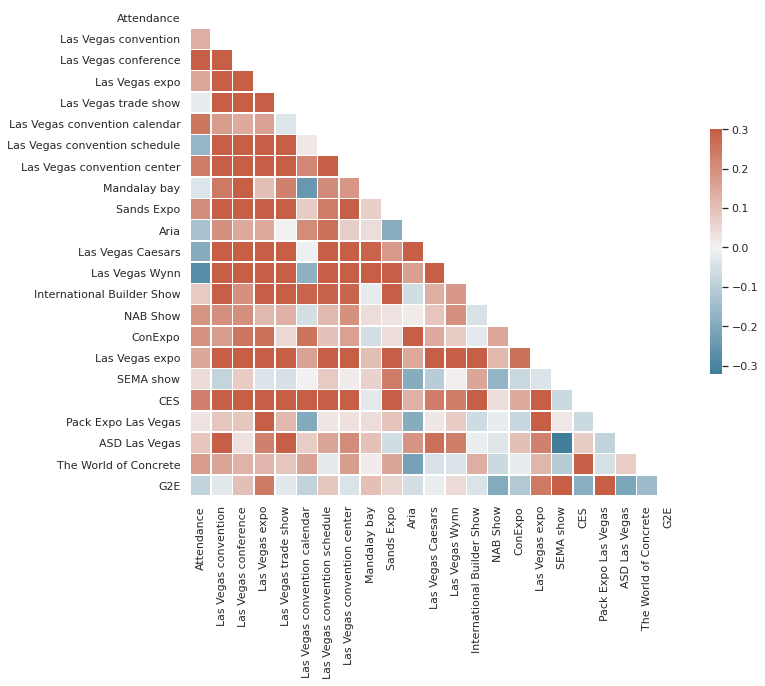

In [ ]:
sns.set_theme(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_results, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_results, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#corr_results.to_csv('/content/gdrive/MyDrive/Event Machine Learning research/correlation results.csv')

In [ ]:
result

date  Las Vegas convention  ...  The World of Concrete  G2E
0   2009-01-01                   100  ...                     60    9
1   2009-02-01                    81  ...                     21   10
2   2009-03-01                    70  ...                     19    9
3   2009-04-01                    49  ...                      0    9
4   2009-05-01                    46  ...                     58   14
..         ...                   ...  ...                    ...  ...
127 2019-08-01                    35  ...                     29   33
128 2019-09-01                    33  ...                     51   40
129 2019-10-01                    33  ...                     31   53
130 2019-11-01                    38  ...                     23    5
131 2019-12-01                    37  ...                     32    3

[132 rows x 23 columns]

**Time Series Forecast**

In [ ]:
!pip install pmdarima

In [ ]:
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse
import statsmodels.api as sm
from pylab import rcParams
from datetime import datetime, timedelta
from dateutil.relativedelta import *
from pmdarima import auto_arima

In [ ]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
#     display(attendance)

In [ ]:
df = attendance.sort_values(by=['date']).set_index('date')
df

Year      month  Attendance
date                                   
2009-01-01  2009    January      538400
2009-02-01  2009   February      583200
2009-03-01  2009      March      446600
2009-04-01  2009      April      414800
2009-05-01  2009        May      341800
...          ...        ...         ...
2019-08-01  2019     August      657800
2019-09-01  2019  September      459400
2019-10-01  2019    October      525300
2019-11-01  2019   November      603200
2019-12-01  2019   December      356100

[132 rows x 3 columns]

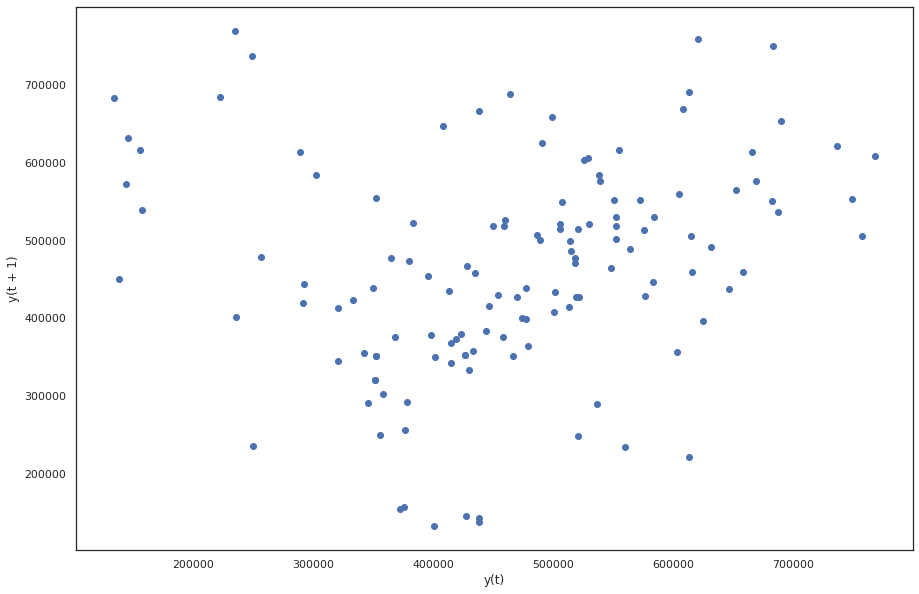

In [ ]:
lag_plot(df['Attendance'])

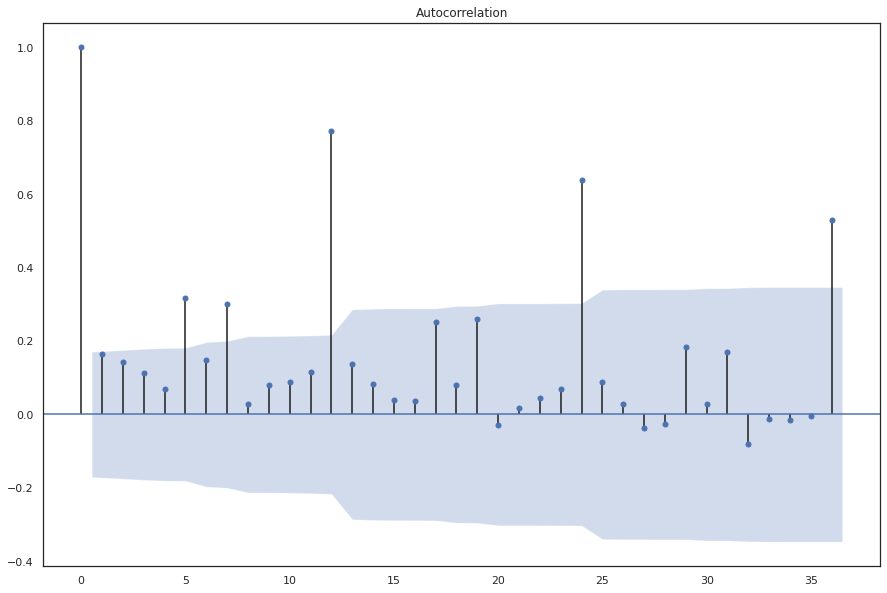

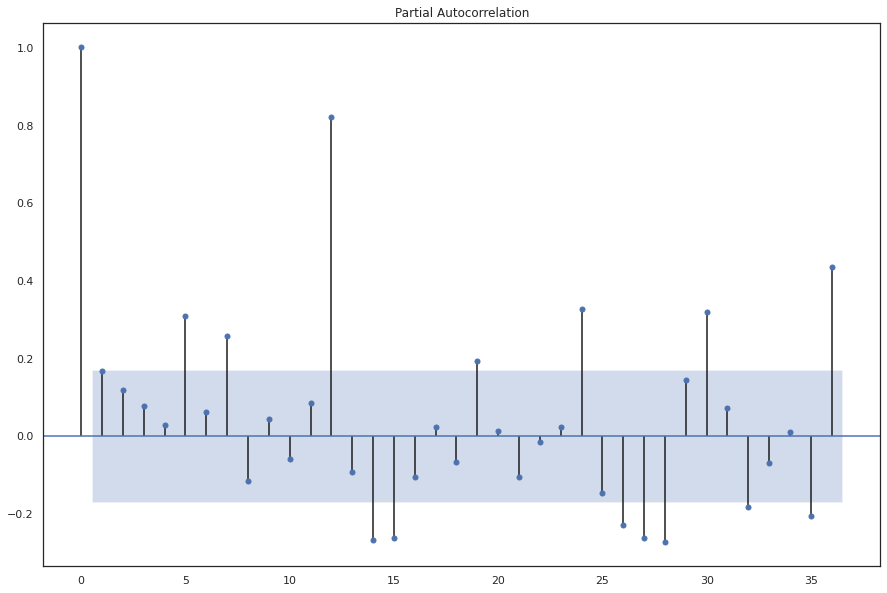

In [ ]:
plot_acf(df['Attendance'], lags=36);
plot_pacf(df['Attendance'], lags=36);

**Augmented Dickey Fuller Test**: if p-value is insignificant, the data has a unit root and is non-stationary

In [ ]:
def adf_test(series, **kw):  
    adf_result = adfuller(series)
    print(f'ADF Statistic: {round(adf_result[0],4)}')
    print(f'number of lags: {adf_result[2]}')
    print(f'p-value: {round(adf_result[1],4)}\n')
    print('Critial Values:')
    for key, value in adf_result[4].items():
        print(f'{key}: {round(value,4)}')
    print(f'\nResult: The series is {"not " if round(adf_result[1],4) > 0.05 else ""}stationary.')

adf_test(df['Attendance'])

ADF Statistic: -0.6228
number of lags: 12
p-value: 0.8657

Critial Values:
1%: -3.4865
5%: -2.8862
10%: -2.5799

Result: The series is not stationary.


**KPSS Test**: if p-value is significant, the data has a unit root and is non-stationary

In [ ]:
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    print(f'KPSS Statistic: {round(statistic,4)}')
    print(f'number of lags: {n_lags}')
    print(f'p-value: {round(p_value,4)}\n')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'{key}: {value}')
    print(f'\nResult: The series is {"not " if p_value < 0.05 else ""}stationary.')

kpss_test(df['Attendance'])

KPSS Statistic: 0.8749
number of lags: 13
p-value: 0.01

Critial Values:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739

Result: The series is not stationary.


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning:

The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




**Seasonality**

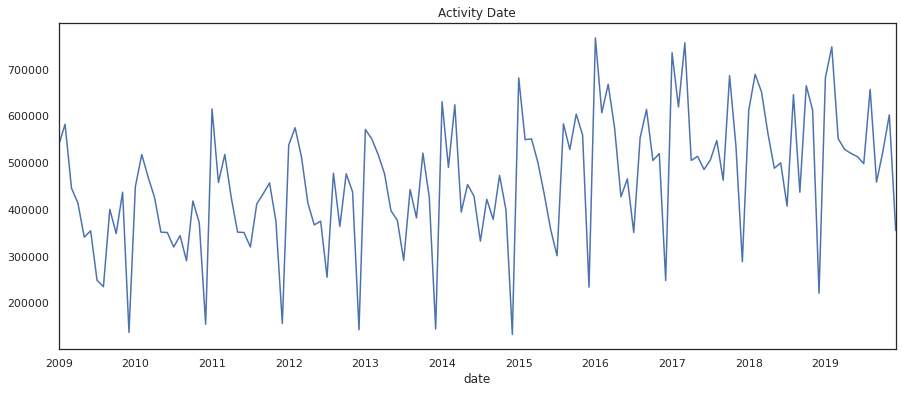

In [ ]:
y = df['Attendance']#.resample('MS').mean()
y_mean = df['Attendance'].resample('MS').mean()
y.plot(figsize=(15, 6), title='Activity Date')
#plt.autoscale(axis='both', tight=True)
plt.show()

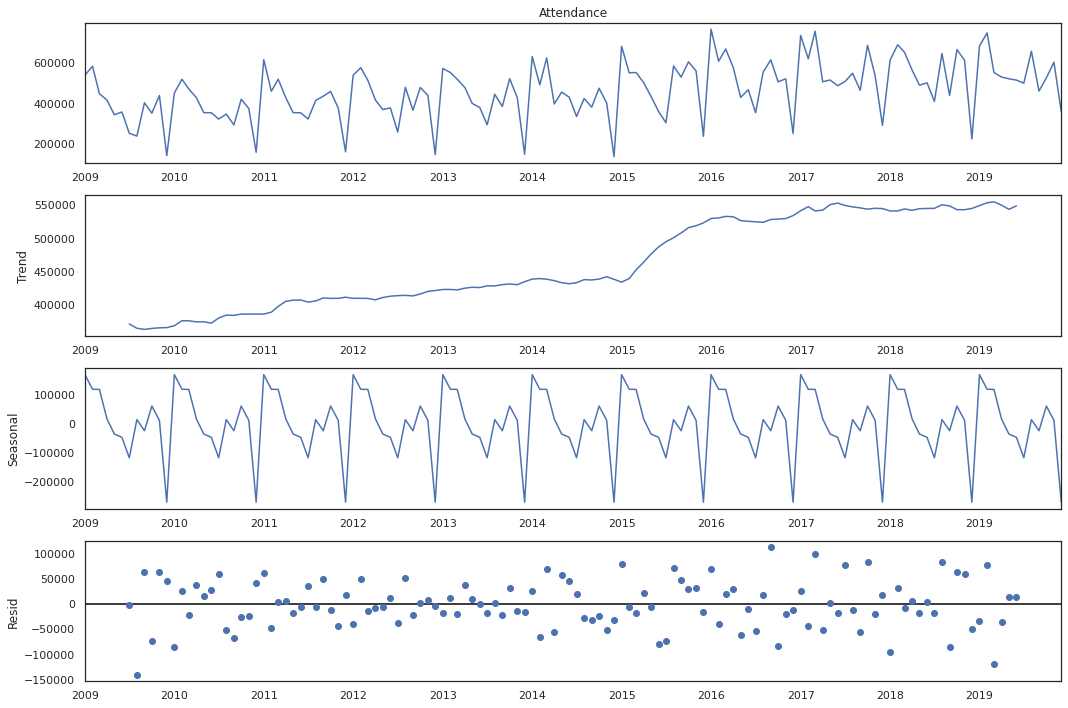

In [ ]:
rcParams['figure.figsize'] = 15, 10
decomposition = sm.tsa.seasonal_decompose(y_mean, model='additive')
fig = decomposition.plot()
plt.show()

**Auto ARIMA**

In [ ]:
# Train test split
train = round(len(df)*0.8)
test = round(len(df)*0.2)
split_date = pd.to_datetime('2009-01-01') + relativedelta(months=train)
train, test, split_date

(106, 26, Timestamp('2017-11-01 00:00:00'))

In [ ]:
df_train = df.iloc[:106].copy()
df_test = df.iloc[106:].copy()

In [ ]:
auto_arima(df['Attendance'], seasonal=True, stationary=False, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, [], 12)   Log Likelihood               -1684.524
Date:                             Sat, 07 Aug 2021   AIC                           3381.048
Time:                                     23:40:57   BIC                           3398.299
Sample:                                          0   HQIC                          3388.058
                                             - 132                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9619      0.292     -3.293      0.001      -1.534      -0.389
ma.L1          0.0422      0.245      0.172      0.863      -0.437       0.521
ma.L2         -0.9174      0.215     -4.261      0.000      -1.339      -0.495
ar.S.L12       0.5086      0.329      1.545      0.122      -0.136       1.154
ar.S.L24       0.2632      0.335      0.787      0.431      -0.393       0.919
sigma2      1.693e+10    2.8e-12   6.06e+21      0.000    1.69e+10    1.69e+10
===================================================================================
Ljung-Box (L1) (Q):                   2.65   Jarque-Bera (JB):                 1.33
Prob(Q):                              0.10   Prob(JB):                         0.51
Heteroskedasticity (H):               1.34   Skew:                             0.14
Prob(H) (two-sided):                  0.33   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.5e+38. Standard errors may be unstable.
"""

In [ ]:
model = SARIMAX(df_train['Attendance'], order=(1,1,2), seasonal_order=(2,0,0,12), enforce_invertibility=False)
results = model.fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          Attendance   No. Observations:                  106
Model:             SARIMAX(1, 1, 2)x(2, 0, [], 12)   Log Likelihood               -1353.511
Date:                             Sat, 07 Aug 2021   AIC                           2719.022
Time:                                     23:40:58   BIC                           2734.946
Sample:                                 01-01-2009   HQIC                          2725.475
                                      - 10-01-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9411      0.847     -1.111      0.266      -2.601       0.718
ma.L1          0.0411      0.707      0.058      0.954      -1.345       1.427
ma.L2         -0.8825      0.601     -1.469      0.142      -2.060       0.295
ar.S.L12       0.4612      0.416      1.109      0.267      -0.354       1.276
ar.S.L24       0.3022      0.440      0.687      0.492      -0.560       1.164
sigma2      1.813e+10   2.41e-11   7.53e+20      0.000    1.81e+10    1.81e+10
===================================================================================
Ljung-Box (L1) (Q):                   1.19   Jarque-Bera (JB):                 2.08
Prob(Q):                              0.28   Prob(JB):                         0.35
Heteroskedasticity (H):               1.59   Skew:                             0.27
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.66e+37. Standard errors may be unstable.
"""

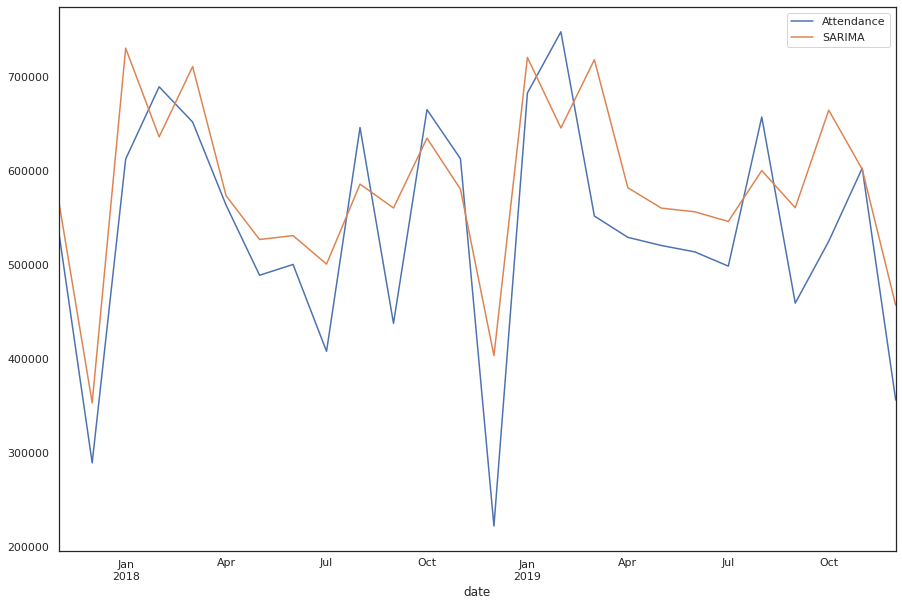

In [ ]:
start = len(df_train)
end = len(df_train)+len(df_test)-1
pred = results.predict(start, end).rename('SARIMA')

df_test['Attendance'].plot(legend=True)
pred.plot(legend=True);

In [ ]:
rmse(df_test['Attendance'], pred)

83635.13958345936

**Prophet**

Stationary data not necessary for Prophet: https://exploratory.io/note/hideaki/FAQ-on-Time-Series-Forecasting-with-Prophet-GuL5xAD0Uw


In [ ]:
from fbprophet import Prophet
import fbprophet
from fbprophet.plot import plot_plotly
import plotly.offline as py
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [ ]:
df_ph = attendance.rename(columns={'date': 'ds', 'Attendance': 'y'})
df_ph['floor'] = 0
df_ph['ds_index'] = df_ph['ds'].copy()
df_ph.set_index('ds_index', inplace=True)
df_ph

Year     month       y         ds  floor
ds_index                                            
2009-01-01  2009   January  538400 2009-01-01      0
2010-01-01  2010   January  449900 2010-01-01      0
2011-01-01  2011   January  615900 2011-01-01      0
2012-01-01  2012   January  538600 2012-01-01      0
2013-01-01  2013   January  572000 2013-01-01      0
...          ...       ...     ...        ...    ...
2015-12-01  2015  December  234700 2015-12-01      0
2016-12-01  2016  December  249000 2016-12-01      0
2017-12-01  2017  December  289100 2017-12-01      0
2018-12-01  2018  December  221800 2018-12-01      0
2019-12-01  2019  December  356100 2019-12-01      0

[132 rows x 5 columns]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint is 0.01
            ds           yhat
139 2020-07-31  613481.171231
140 2020-08-31  556739.896467
141 2020-09-30  637107.930481
142 2020-10-31  597552.514212
143 2020-11-30  328261.932752


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint is 0.1
            ds           yhat
139 2020-07-31  636496.444845
140 2020-08-31  528943.542829
141 2020-09-30  635590.618173
142 2020-10-31  600014.996867
143 2020-11-30  339313.755899


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint is 0.5
            ds           yhat
139 2020-07-31  612876.285313
140 2020-08-31  495728.331172
141 2020-09-30  609040.726268
142 2020-10-31  575644.915160
143 2020-11-30  314062.287369


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint is 1
            ds           yhat
139 2020-07-31  611461.197596
140 2020-08-31  493781.219137
141 2020-09-30  608073.803759
142 2020-10-31  574316.139065
143 2020-11-30  311469.490906


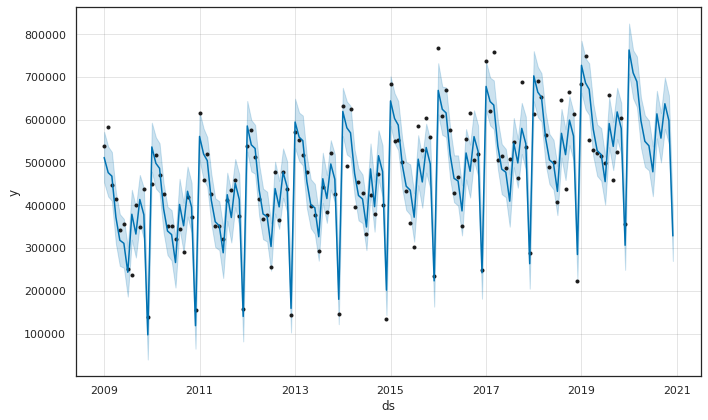

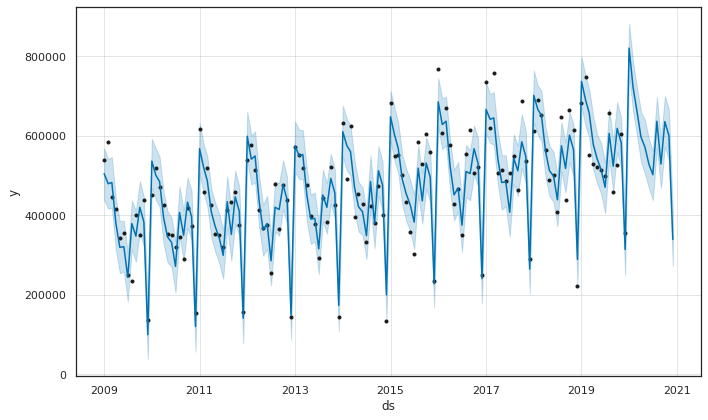

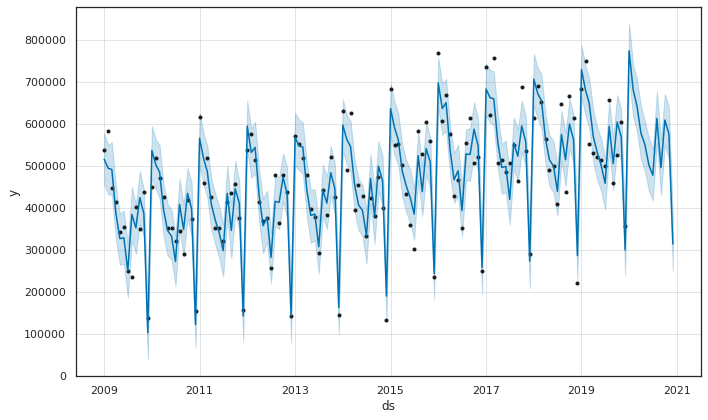

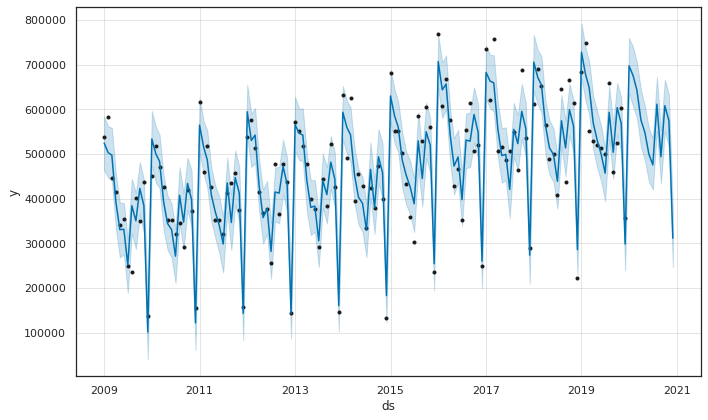

In [ ]:
for changepoint in [0.01, 0.1, 0.5,1]:
    model = fbprophet.Prophet(changepoint_prior_scale=changepoint)
    model.add_country_holidays(country_name='US')
    model.fit(df_ph)
    future = model.make_future_dataframe(periods=12, freq='M')
    future = model.predict(future)
    print(f'Changepoint is {changepoint}')
    print(future[['ds','yhat']].tail())
    model.plot(future)
    #cpe_ph[changepoint] = future['yhat']


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds           yhat     yhat_lower     yhat_upper
139 2020-07-31  613481.171231  553227.461750  673243.963963
140 2020-08-31  556739.896467  497376.929771  612225.400145
141 2020-09-30  637107.930481  581373.108060  699496.029404
142 2020-10-31  597552.514212  539762.130069  653828.032249
143 2020-11-30  328261.932752  262360.765214  388003.365210


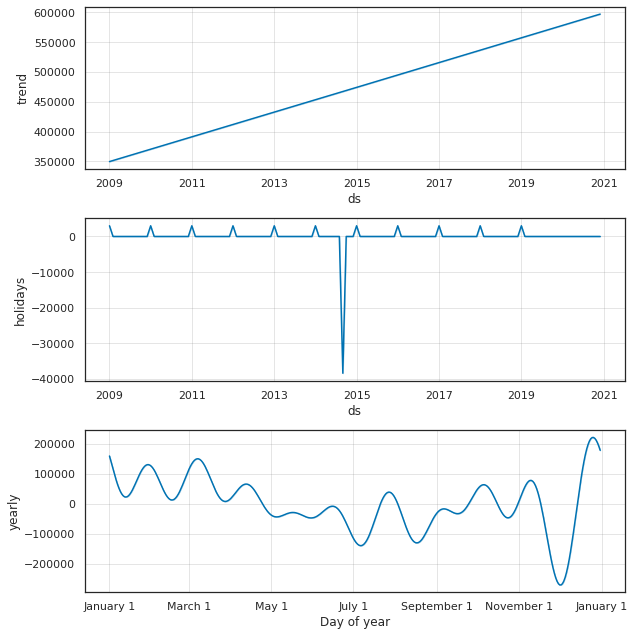

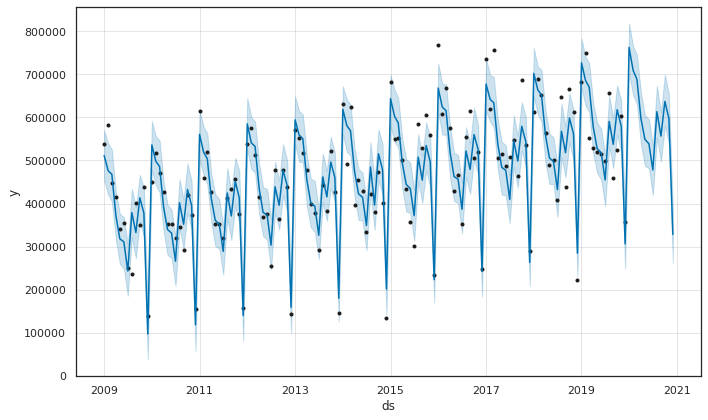

In [ ]:
df_prophet = fbprophet.Prophet(changepoint_prior_scale=0.01) # seasonality_mode='multiplicative'; growth = 'logistic' in Prophet
df_prophet.add_country_holidays(country_name='US')
df_prophet.fit(df_ph)

df_forecast = df_prophet.make_future_dataframe(periods=12, freq='M')
df_forecast = df_prophet.predict(df_forecast)

print(df_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
df_prophet.plot_components(df_forecast)

fig = df_prophet.plot(df_forecast)
py.init_notebook_mode()
fig = plot_plotly(df_prophet, df_forecast)
fig.update_xaxes(title_text="Time")
fig.update_yaxes(title_text="#")
py.iplot(fig)

In [ ]:
### Model evaluation:
initial = 12
cutoffs = pd.date_range(start='2017-12-01', end='2018-12-01', freq='MS')
print(cutoffs)

DatetimeIndex(['2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01'],
              dtype='datetime64[ns]', freq='MS')


In [ ]:
# cross_validation won't work for momthly data: https://github.com/facebook/prophet/issues/1672
df_cv = cross_validation(df_prophet, horizon='365 days', cutoffs=cutoffs)
df_cv.head()

ds           yhat     yhat_lower     yhat_upper       y     cutoff
0 2018-01-01  722207.985374  673112.369507  772880.914870  612900 2017-12-01
1 2018-02-01  659411.380392  607730.893691  709046.702001  690000 2017-12-01
2 2018-03-01  671070.829452  620191.126009  719648.983079  652400 2017-12-01
3 2018-04-01  567852.704555  519516.633989  617305.712878  563800 2017-12-01
4 2018-05-01  513843.335480  461305.028401  564150.973486  489100 2017-12-01

  horizon           mse          rmse  ...      mape     mdape  coverage
0 59 days  3.511778e+09  59260.255170  ...  0.094815  0.066470  0.600000
1 61 days  3.299203e+09  57438.688904  ...  0.090599  0.081046  0.658333
2 62 days  3.350190e+09  57880.822796  ...  0.094881  0.084431  0.650000
3 89 days  3.051140e+09  55237.124114  ...  0.091507  0.081046  0.691667
4 90 days  3.846564e+09  62020.676235  ...  0.101703  0.081046  0.666667

[5 rows x 7 columns]
    horizon           mse          rmse  ...      mape     mdape  coverage
31 306 days  5.466598e+09  73936.444141  ...  0.133219  0.106803  0.466667
32 334 days  6.244065e+09  79019.397411  ...  0.130497  0.086605  0.577778
33 335 days  4.976622e+09  70545.175940  ...  0.116973  0.083205  0.629630
34 337 days  4.836647e+09  69546.008232  ...  0.114488  0.088889  0.600000
35 365 days  4.583388e+09  67700.724961  ...  0.120267  0.094058  0.440000

[5 rows x 7 columns]
Root Mean Square Error Plot


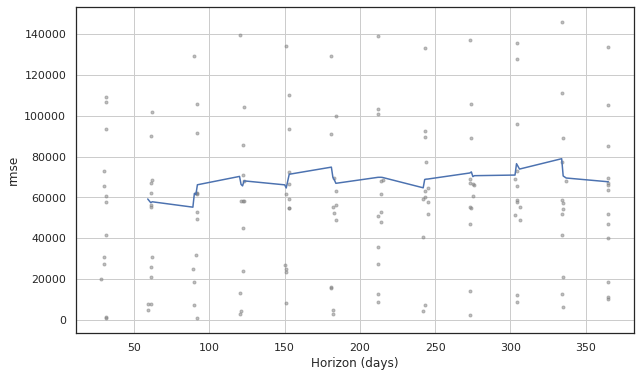

In [ ]:
df_p = performance_metrics(df_cv)
print(df_p.head())
print(df_p.tail())

print('Root Mean Square Error Plot')
plot_cross_validation_metric(df_cv, metric='rmse');

**LSTM**

In [ ]:
import math
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.utils import Sequence
from tensorflow.keras.layers import Flatten, Dense, LSTM, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
np.random.seed(42)

In [ ]:
dfo_lstm = np.asarray(dfo['Attendance'].to_frame())

In [ ]:
# Normalize data first 
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dfo_lstm)

In [ ]:
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train = dataset[0:train_size, :]
test = dataset[train_size:len(dataset), :]

In [ ]:
# Convert array to dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


In [ ]:
# Reshape into X=t, Y=t+1
look_back = 4
n_features = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape)

(100, 4)


In [ ]:
# Reshape input to [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:
model=Sequential()
model.add(LSTM(100,activation='relu', input_shape=(look_back,n_features), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, activation='sigmoid', return_sequences=False))
# model.add(Dense(100))
# model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
Xdata_train=[]
Ydata_train=[]

Xdata_train, Ydata_train = create_dataset(train, look_back)
Xdata_train = np.reshape(Xdata_train, (Xdata_train.shape[0], Xdata_train.shape[1], 1))

In [ ]:
# Training for all data
history = model.fit(Xdata_train, Ydata_train, batch_size=1, epochs=50, shuffle=False)

Epoch 1/50
100/100 [==============================] - 5s 7ms/step - loss: 0.1299
Epoch 2/50
100/100 [==============================] - 1s 6ms/step - loss: 0.0562
Epoch 3/50
100/100 [==============================] - 1s 6ms/step - loss: 0.0559
Epoch 4/50
100/100 [==============================] - 1s 6ms/step - loss: 0.0527
Epoch 5/50
100/100 [==============================] - 1s 7ms/step - loss: 0.0498
Epoch 6/50
100/100 [==============================] - 1s 7ms/step - loss: 0.0474
Epoch 7/50
100/100 [==============================] - 1s 7ms/step - loss: 0.0454
Epoch 8/50
100/100 [==============================] - 1s 6ms/step - loss: 0.0438
Epoch 9/50
100/100 [==============================] - 1s 7ms/step - loss: 0.0426
Epoch 10/50
100/100 [==============================] - 1s 6ms/step - loss: 0.0416
Epoch 11/50
100/100 [==============================] - 1s 6ms/step - loss: 0.0407
Epoch 12/50
100/100 [==============================] - 1s 7ms/step - loss: 0.0400
Epoch 13/50
100/100 [====

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
# Calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 119070.23 RMSE
Test Score: 203546.01 RMSE


In [ ]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [ ]:
# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

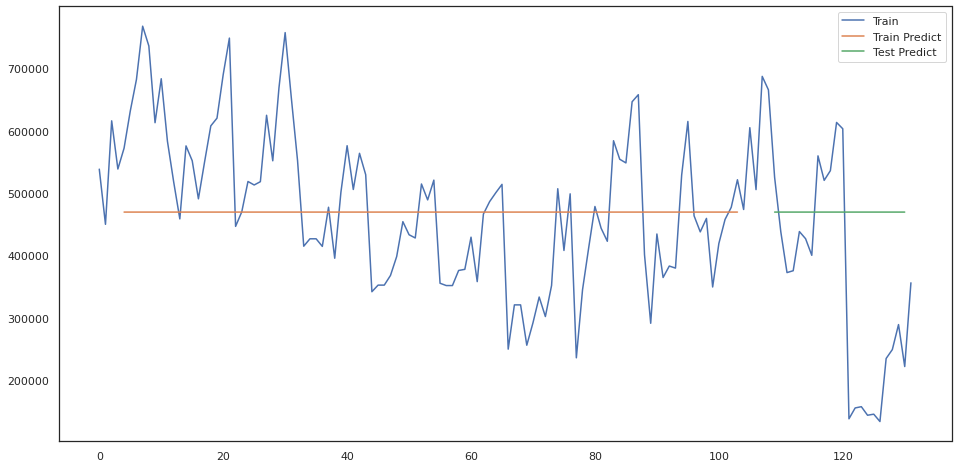

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Train','Train Predict','Test Predict'],loc='best')
plt.show()